In [21]:
import csv
import random

rows = 1000
with open('new_data.csv', 'w') as f:
    file = csv.writer(f)

    file.writerow(['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
   
    for _ in range(rows):
        salary = random.randint(50000, 1200000)
        city = random.choice(['Bishkek', 'Karakol', 'Osh', 'Kara-Balta', 'Naryn', 'Talas', 'Batken', 'Djalal-Abad', 'Balykchy'])
        age = random.randint(20, 80)
        vacation_prefer = random.choice(['Beach', 'Shopping', 'At home', 'Walking', 'Sport', 'Mountain', 'Park', 'Diving'])
        transport_prefer = random.choice(['auto', 'plane', 'train', 'boat', 'cruise'])
        target = random.choice(['Astana', 'Ankara', 'Berlin', 'Tashkent', 'Washington', 'Paris', 'Vien', 'Rome'])
    
        file.writerow([salary, city, age, vacation_prefer, transport_prefer, target])

In [22]:
import pandas as pd

holiday_df = pd.read_csv('new_data.csv')
df = holiday_df.copy(deep=True)
holiday_df.isnull().sum()

salary              0
city                0
age                 0
vacation_prefer     0
transport_prefer    0
target              0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

categorical_columns = ['city', 'vacation_prefer', 'transport_prefer', 'target']

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

num_features = X.select_dtypes(include=['int64', 'float64']).columns
transformer = MinMaxScaler()

# exclude 'target'
cat_features = categorical_columns[:-1]
transformer1 = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer, num_features),
        ('cat', transformer1, cat_features)
    ])

svm = SVC()
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm)])
clf.fit(X_train, y_train)

data_predict = pd.DataFrame({
    'salary': [80000],
    'city': ['Osh'],
    'age': [22],
    'vacation_prefer': ['Camping'],
    'transport_prefer': ['bus']
})

# ensure the columns are in the same order as the training data
data_predict = data_predict[X.columns]

prediction = clf.predict(data_predict)
print('predicted target city:', prediction[0])
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

predicted target city: Vien
Accuracy: 0.144


In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['city', 'vacation_prefer', 'transport_prefer', 'target']
le = LabelEncoder()

for c in categorical_columns:
    df[c] = le.fit_transform(df[c])

df

,salary,city,age,vacation_prefer,transport_prefer,target
0,341083,5,24,2,2,6
1,625448,4,38,7,0,7
2,733823,8,63,3,0,4
3,471425,2,78,3,3,0
4,933696,3,42,4,3,5
...,...,...,...,...,...,...
995,318075,3,49,1,3,7
996,1171009,6,30,4,3,3
997,591209,4,59,1,0,4
998,542817,5,43,5,1,7


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']

# normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('model accuracy:', accuracy)

model accuracy: 0.12


[[ 8 10  5  1  0  0  7  2]
 [ 6 12  1  4  0  2  4  0]
 [10 13  4  4  0  1  2  0]
 [10 12  5  1  0  1  5  0]
 [ 6  7  5  0  0  3  7  0]
 [ 3 10  2  2  0  0  2  0]
 [10 13  5  3  0  1  5  0]
 [12 13  4  1  0  2  4  0]]


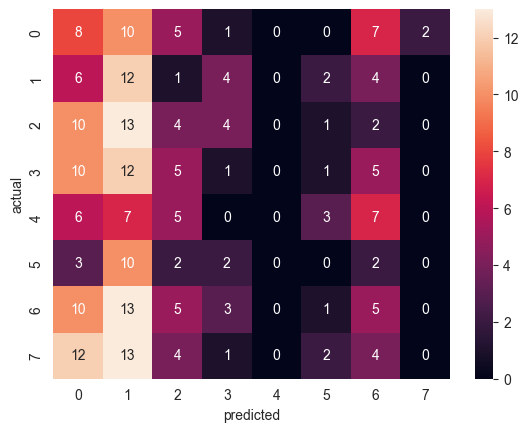

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

sns.heatmap(confusion, annot=True)

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [27]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_combo = {'gamma': gamma, 'C': C}

print('best SVM score: {}'.format(best_svc))
print('best parameters: {}'.format(best_combo))

best SVM score: 0.124
best parameters: {'gamma': 100, 'C': 10}


In [28]:
# grid search using sklearn lib
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.112
best params:  {'C': 10, 'gamma': 0.001}
best score:  0.15733333333333333
whole args view : SVC(C=10, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072894,0.009242,0.016743,0.002225,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.153333,0.153333,0.153333,0.146667,0.153333,0.152,0.002667,4
1,0.050013,0.006253,0.015631,0.000001,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.153333,0.153333,0.153333,0.146667,0.153333,0.152,0.002667,4
2,0.060579,0.007118,0.018757,0.006252,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.153333,0.153333,0.153333,0.146667,0.153333,0.152,0.002667,4
3,0.070175,0.009636,0.021911,0.007693,0.001,1,"{'C': 0.001, 'gamma': 1}",0.153333,0.153333,0.153333,0.146667,0.153333,0.152,0.002667,4
4,0.062978,0.009927,0.018755,0.006252,0.001,10,"{'C': 0.001, 'gamma': 10}",0.153333,0.153333,0.153333,0.146667,0.153333,0.152,0.002667,4


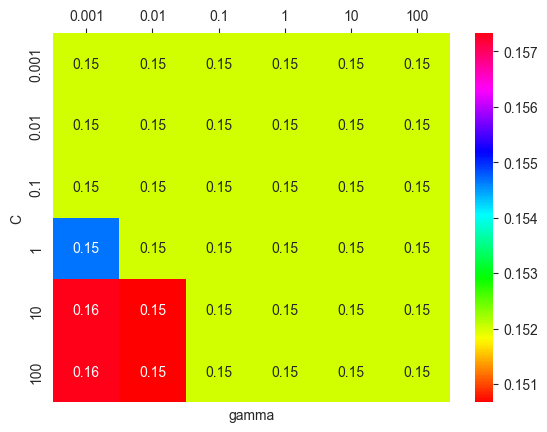

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.24      0.16        33
           1       0.13      0.41      0.20        29
           2       0.13      0.12      0.12        34
           3       0.06      0.03      0.04        34
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        19
           6       0.14      0.14      0.14        37
           7       0.00      0.00      0.00        36

    accuracy                           0.12       250
   macro avg       0.07      0.12      0.08       250
weighted avg       0.08      0.12      0.09       250


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
